In [2]:
!pip install researchpy


In [4]:
import pandas as pd
import researchpy as rp

# Step 1: Create a DataFrame for the data
data = {

    'Smart Thermostat': [50, 80, 60, 30, 20],
    'Smart Light': [70, 100, 90, 50, 50]
}

In [5]:
df = pd.DataFrame(data)
table,results = rp.crosstab(df["Smart Thermostat"],df["Smart Light"],test="chi-square")
table

results

/usr/local/lib/python3.11/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 12.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


,Chi-square test,results
0,Pearson Chi-square ( 12.0) =,15.0000
1,p-value =,0.2414
2,Cramer's V =,1.0000


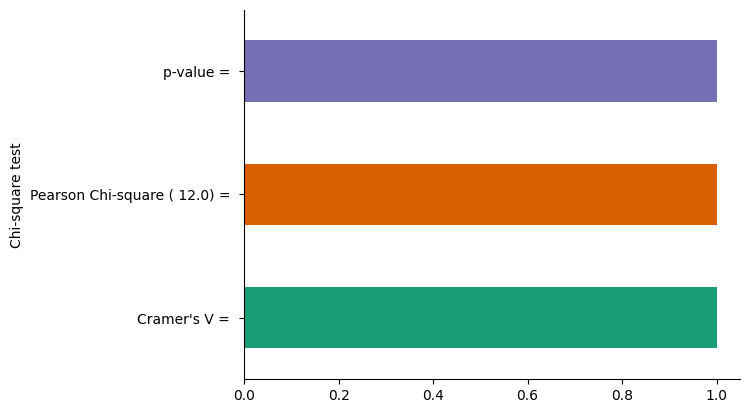

In [6]:
# @title Chi-square test

from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('Chi-square test').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
from scipy.stats import chi2

# Given significance level (alpha) and degrees of freedom (df)
alpha = 0.05
df = len(data) - 1  # Assuming 'data' is your contingency table

pvalue=0.2414

Determine the Critical Value:

In [8]:
 # Calculate the critical value
critical_value = chi2.ppf(1 - alpha, df)

print("Critical Value:", critical_value)


Critical Value: 3.841458820694124


In [9]:
from scipy.stats import chi2_contingency

df = pd.DataFrame(data)

# Step 2: Perform chi-square test using scipy.stats
chi2, pvalue, dof, expected = chi2_contingency(df)

# Print chi-square value
print("Chi-Square Value:", chi2)

Chi-Square Value: 5.638227513227513


In [10]:
if chi2 > critical_value:
    print("Reject Null Hypothesis (H0): There is a significant association between the type of device and customer satisfaction.")
else:
    print("Fail to Reject Null Hypothesis (H0): There is no significant association between the type of device and customer satisfaction.")

Reject Null Hypothesis (H0): There is a significant association between the type of device and customer satisfaction.


In [11]:
if pvalue > critical_value:
    print("Reject Null Hypothesis (H0): There is a significant association between the type of device and customer satisfaction.")
else:
    print("Fail to Reject Null Hypothesis (H0): There is no significant association between the type of device and customer satisfaction.")

Fail to Reject Null Hypothesis (H0): There is no significant association between the type of device and customer satisfaction.
